# Final Project Template 

# Dan's Final Project Template

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

Hemophagocytic lymphohistiocytosis (HLH) is a T-cell mediated inflammatory syndrome associated with immune activation and NK cell dysfunction. In the context of CAR T-cells, HLH occurs in a subset of those with cytokine release syndrome (CRS) and results in increased patient morbidity. HLH is often refactory to IL-6 blockade, the agent traditionally used to treat CAR T-cell related inflammatory toxicities, and requires the addition IL-1R blockade. Early intervention may result in decreased patient morbidity, yet predisposing factors for toxicity development are not yet well established. Here, I seek to use patient and product characteristics from an ongoing phase 1 study of CAR T-cells to develop a model to predict those at increased risk of HLH.

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing

In [1]:
from IPython.display import IFrame
IFrame(src="https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing", width='100%', height='500px')

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [3]:
#!pip install xgboost 
import pandas as pd
#import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import xgboost as xgb
import re

df = pd.read_csv("DL_Final_Proj.csv")

In [4]:
df.describe()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
count,67.000000,67.000000,60.000000,60.000000,62.000000,59.00000,59.000000,59.000000,57.000000,55.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,48.000000,48.000000,33.000000
mean,531.283582,0.119403,0.350000,0.866667,0.677419,0.40678,0.254237,0.644068,52.621474,46.510909,...,1.271833,1.378292,1.215583,178.289583,177.705625,101.846383,0.974170,1.027875,21.425042,1176.578485
std,309.443969,0.326709,0.480995,0.342803,0.471280,0.49545,0.439169,0.482905,35.010957,31.727449,...,2.769635,1.187720,3.911200,423.783595,265.607171,161.177838,3.072776,1.425467,14.893415,1086.562946
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000,0.500000,...,0.230000,0.700000,0.110000,0.370000,5.630000,0.220000,0.210000,0.240000,4.750000,154.040000
25%,283.500000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,20.000000,14.100000,...,0.280000,0.717500,0.120000,5.890000,36.847500,14.730000,0.250000,0.292000,11.475000,636.880000
50%,556.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,52.600000,52.600000,...,0.340000,0.792000,0.140000,21.415000,73.865000,38.070000,0.260000,0.730000,16.995000,889.340000
75%,812.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.500000,1.000000,87.000000,76.650000,...,0.837500,1.632500,0.811500,62.420000,164.895000,120.900000,0.435000,1.125000,27.025000,1161.360000
max,988.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,97.000000,...,17.740000,5.940000,27.070000,1530.000000,1198.000000,714.650000,20.900000,9.370000,66.940000,4961.220000


In [5]:
df.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,3.03,0.70,0.11,2.34,199.24,3.81,0.27,0.25,18.92,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,0.35,1.63,0.12,39.16,143.12,56.94,0.39,1.15,15.07,746.89
2,16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,0.81,1.14,0.13,4.07,36.78,1.83,0.80,0.77,5.05,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,0.33,2.65,2.65,12.28,20.61,31.58,0.30,0.73,11.59,633.19


In [6]:
df.tail()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
62,934,0,0.0,1.0,1.0,1.0,0.0,1.0,27.0,6.6,...,0.27,1.44,1.44,58.33,74.84,13.90,0.36,0.80,27.00,1336.93
63,951,0,0.0,1.0,0.0,1.0,0.0,1.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,954,0,1.0,1.0,0.0,0.0,0.0,0.0,75.0,56.8,...,17.74,2.72,27.07,1472.00,1148.00,706.98,20.90,9.37,37.95,4373.75
65,985,0,1.0,1.0,0.0,0.0,1.0,1.0,85.0,88.9,...,0.29,0.71,0.12,29.58,105.35,45.08,0.25,0.76,15.81,1269.76
66,988,0,0.0,1.0,1.0,1.0,0.0,0.0,77.0,12.8,...,0.78,2.19,2.19,90.34,72.89,60.60,0.49,0.82,12.78,1389.20


In [7]:
df.dtypes

RANDOMIZED ID                           int64
Exclude from Analysis (0=No/1=Yes)      int64
HLH (0=No/1=Yes)                      float64
CRS (0=N/1=Y)                         float64
Prior HCT (0=N/1=Y)                   float64
                                       ...   
Cytokines_Day 9_IL-10                 float64
Cytokines_Day 9_IL-12p70              float64
Cytokines_Day 9_IL-13                 float64
Cytokines_Day 9_IL-15                 float64
Cytokines_Day 9_IL-18                 float64
Length: 143, dtype: object

In [8]:
#checking to make sure no object type variables 
df.select_dtypes(include='object')

""
0
1
2
3
4
...
62
63
64
65


In [9]:
df.shape

(67, 143)

In [10]:
#assigning pts who were not infused to be excluded
exclude = df[df['Exclude from Analysis (0=No/1=Yes)'] == 1].index
exclude

Int64Index([2, 7, 8, 17, 33, 45, 46, 58], dtype='int64')

In [11]:
#excluding non-infused pts, only infused (inf) remain
df_inf = df.drop(exclude, axis=0)
df_inf

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.030,0.700,0.110,2.34,199.24,3.81,0.270,0.250,18.920,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,0.350,1.630,0.120,39.16,143.12,56.94,0.390,1.150,15.070,746.89
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,0.810,1.140,0.130,4.07,36.78,1.83,0.800,0.770,5.050,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,0.330,2.650,2.650,12.28,20.61,31.58,0.300,0.730,11.590,633.19
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,0.330,2.960,0.130,5.83,16.75,23.53,0.300,0.730,6.970,NaN
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.280,0.750,0.140,1.09,445.00,0.22,0.240,0.240,7.410,NaN
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,0.280,0.720,0.120,20.40,40.59,40.41,0.260,0.410,39.410,889.34
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,0.350,0.700,0.140,27.12,40.97,168.55,0.250,0.240,39.480,NaN
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,0.920,0.720,0.310,168.60,120.03,117.50,0.450,0.280,13.480,1052.87
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#looking at correlation generally
cor = df_inf.corr(method='spearman')
cor 

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
RANDOMIZED ID,1.000000,NaN,0.209952,0.243152,-0.077817,0.224897,-0.038858,-0.114331,0.287104,-0.182366,...,0.184241,0.045728,0.241140,0.347605,0.207794,0.227505,0.097445,0.260170,0.300879,0.431484
Exclude from Analysis (0=No/1=Yes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HLH (0=No/1=Yes),0.209952,NaN,1.000000,0.272750,-0.122489,0.032978,0.135037,-0.186717,0.183565,0.207150,...,0.237171,-0.109639,-0.015036,0.370750,0.168819,0.378188,0.015571,0.054665,0.397220,0.286578
CRS (0=N/1=Y),0.243152,NaN,0.272750,1.000000,-0.015435,0.303822,-0.026523,-0.272750,0.107264,0.049599,...,0.186072,-0.094461,0.051350,0.310330,-0.137355,0.528719,0.015884,-0.030550,0.422240,NaN
Prior HCT (0=N/1=Y),-0.077817,NaN,-0.122489,-0.015435,1.000000,-0.050803,0.133255,-0.031274,0.155074,-0.146235,...,-0.131573,0.095678,-0.112560,-0.050362,0.043167,-0.136280,0.015454,0.145814,-0.071944,-0.078604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cytokines_Day 9_IL-10,0.227505,NaN,0.378188,0.528719,-0.136280,0.033032,0.067279,-0.241133,0.249975,-0.017140,...,0.345201,0.061109,0.265289,0.706096,0.246130,1.000000,0.207800,0.223272,0.582362,0.247326
Cytokines_Day 9_IL-12p70,0.097445,NaN,0.015571,0.015884,0.015454,0.098069,-0.104310,-0.046541,0.169418,-0.280819,...,0.573500,0.324798,0.375598,0.494098,0.332740,0.207800,1.000000,0.515694,0.162801,0.194739
Cytokines_Day 9_IL-13,0.260170,NaN,0.054665,-0.030550,0.145814,0.011113,0.201802,-0.020525,0.335844,-0.217986,...,0.272282,0.501904,0.463979,0.580684,0.588334,0.223272,0.515694,1.000000,0.208263,0.436026
Cytokines_Day 9_IL-15,0.300879,NaN,0.397220,0.422240,-0.071944,0.269658,0.270004,-0.097804,0.369559,-0.110927,...,0.277695,-0.028145,0.127398,0.589922,0.391073,0.582362,0.162801,0.208263,1.000000,0.242981


In [13]:
#Correlation with output variable
cor_target = abs(cor["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr50_features, corr40_features, corr30_features = cor_target[cor_target>0.5], cor_target[cor_target>0.4], cor_target[cor_target>0.3]
print(corr30_features)

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
Max Grade CRS                             0.447424
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18          

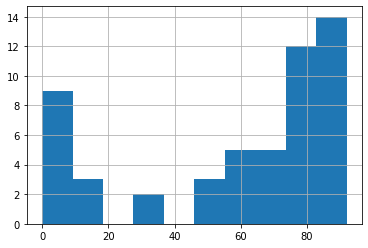

In [14]:
#visualizing histograms of data
#df_inf.iloc[:, 2:17].hist()
df_inf["CAR EXPANSION (% of T Cells)_Day 10-14"].hist()
pl.show()


In [15]:
#visualizing HLH by grade of CRS, making dummy variables for each

pd.crosstab(df_inf['HLH (0=No/1=Yes)'], df_inf['Max Grade CRS'], rownames=['HLH_infused'])

dummy_ranks = pd.get_dummies(df_inf['Max Grade CRS'], prefix='Max Grade CRS')
dummy_ranks.head()
cols_to_keep = df_inf.drop(columns='Max Grade CRS')
cols_to_keep

df_crs = cols_to_keep.join(dummy_ranks.iloc[:,:])
df_crs.head()
df_crs


,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.81,0.270,0.250,18.920,NaN,0,1,0,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,56.94,0.390,1.150,15.070,746.89,0,1,0,0,0
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,1.83,0.800,0.770,5.050,NaN,1,0,0,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,31.58,0.300,0.730,11.590,633.19,0,0,1,0,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,23.53,0.300,0.730,6.970,NaN,0,1,0,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.22,0.240,0.240,7.410,NaN,1,0,0,0,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,40.41,0.260,0.410,39.410,889.34,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,168.55,0.250,0.240,39.480,NaN,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,117.50,0.450,0.280,13.480,1052.87,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [16]:
#visualizing HLH by dose level, making dummy variables for each

pd.crosstab(df_crs['HLH (0=No/1=Yes)'], df_inf['Dose Level'], rownames=['HLH_infused'])

dummy_ranks2 = pd.get_dummies(df_crs['Dose Level'], prefix='Dose Level')
dummy_ranks2.head()
cols_to_keep2 = df_crs.drop(columns='Dose Level')
cols_to_keep2

df_fin = cols_to_keep2.join(dummy_ranks2.iloc[:,:])
df_fin.head()
df_fin

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,18.920,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,15.070,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,5.050,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,11.590,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,6.970,NaN,0,1,0,0,0,1,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,7.410,NaN,1,0,0,0,0,0,1,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,39.410,889.34,0,0,1,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,39.480,NaN,0,0,1,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,13.480,1052.87,0,0,1,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,0,0,1,0,0,1,0,0


## 4) Show me the head of your data.

In [17]:
df_fin.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,18.92,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,15.07,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,5.05,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,11.59,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,69.6,...,6.97,NaN,0,1,0,0,0,1,0,0


## 5) Show me the shape of your data

In [18]:
df_fin.shape

(59, 149)

## 6) Show me the proportion of missing observations for each column of your data

In [19]:
df_fin.isna().sum()
#df_fin.notna().sum()

RANDOMIZED ID                         0
Exclude from Analysis (0=No/1=Yes)    0
HLH (0=No/1=Yes)                      0
CRS (0=N/1=Y)                         0
Prior HCT (0=N/1=Y)                   0
                                     ..
Max Grade CRS_3.0                     0
Max Grade CRS_4.0                     0
Dose Level_1.0                        0
Dose Level_2.0                        0
Dose Level_3.0                        0
Length: 149, dtype: int64

In [20]:
df_fin.isna().sum().sum()

1313

In [21]:
df_fin.notna().sum().sum()

7478

In [22]:
#determining % of missing data
df_fin.isna().sum().sum() / (df_fin.isna().sum().sum() + df_fin.notna().sum().sum())

0.14935729723580934

In [23]:
#looking at correlation generally
cor2 = df_fin.corr(method='spearman')
cor2 

#Correlation with output variable
cor_target2 = abs(cor2["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr2_50_features, corr2_40_features, corr2_30_features = cor_target2[cor_target2>0.5], cor_target2[cor_target2>0.4], cor_target2[cor_target2>0.3]
print(corr2_30_features)

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18                     0.392677
Cytokines_Day 5_GM-CSF         

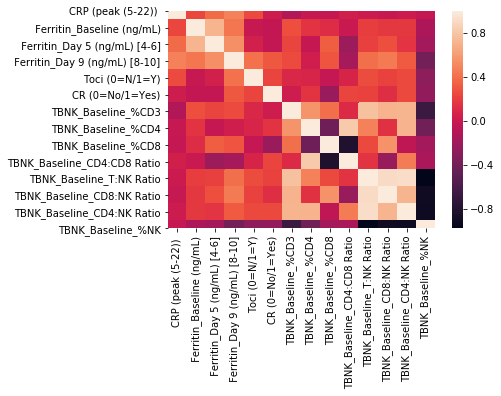

In [24]:
#heatmap of variables
#sns.heatmap(df_fin.iloc[:, 2:15].corr(method='spearman'))
sns.heatmap(df_fin.iloc[:, 16:30].corr(method='spearman'))

#there are a lot of variables that correlate with eachoteher, will have to deal with that
#eg since %NK feeds into T:NK ratios, etc

In [25]:
#dealing with error resulting from ' and < symbols in columns
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_fin.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_fin.columns.values]

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

#### HLH

In [26]:
#assigning predictors (X) and target (y)
X = df_fin.drop(columns=['HLH (0=No/1=Yes)', 'Exclude from Analysis (0=No/1=Yes)', 'RANDOMIZED ID', 'Toci (0=N/1=Y)'], axis=1); X
y = df_fin['HLH (0=No/1=Yes)']; y
X.shape, df_fin.shape, y.shape

((59, 145), (59, 149), (59,))

In [27]:
from sklearn.model_selection import train_test_split

#reproducibility
test_size = .33
cv=3
seed=42

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [28]:
#xgboost for df_fin dataset using xgboost as model b/c built in method to deal with missing values
from xgboost.sklearn import XGBClassifier
X_dmatrix = xgb.DMatrix(data=X,label=y)
X_train_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
X_test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

preds



/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [29]:
#looking at classification report to see how model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        13
         1.0       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20



In [30]:
# train-test split evaluation of xgboost model (default params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.00%


In [31]:
HLH_neg = df_fin[df_fin['HLH (0=No/1=Yes)'] == 0].index
HLH_pos = df_fin[df_fin['HLH (0=No/1=Yes)'] == 1].index

#HLH_incidence
HLH_pos.size/(HLH_pos.size + HLH_neg.size)

#so, if always guess HLH- expect ~65% accuracy

0.3559322033898305

In [32]:
# k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold = KFold(n_splits=cv, random_state=seed)
results_def = cross_val_score(xg_class, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))
results_def

Accuracy: 69.47% (4.15%)


array([0.75      , 0.65      , 0.68421053])

In [33]:
# stratified k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import StratifiedKFold

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold_strat = StratifiedKFold(n_splits=cv, random_state=seed)
results_strat = cross_val_score(xg_class, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))
results_strat

Accuracy: 72.98% (5.87%)


array([0.65      , 0.75      , 0.78947368])

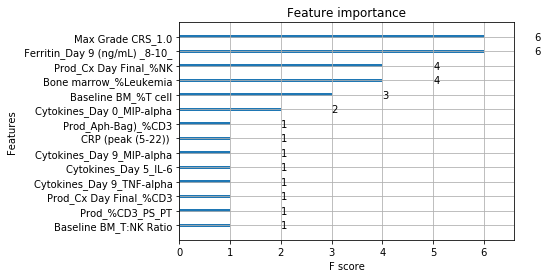

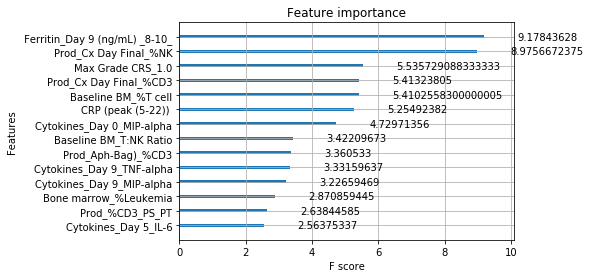

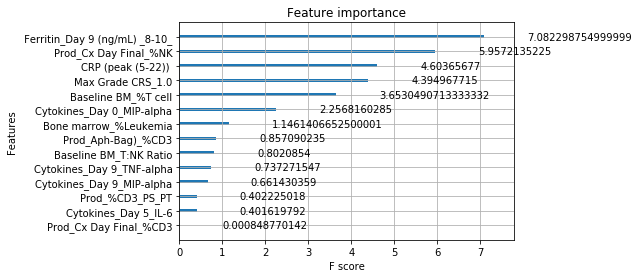

In [34]:
#ft importance of test set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier_train = xgb.train(params= params_default, dtrain = X_train_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_train, importance_type = 'weight'), xgb.plot_importance(xg_classifier_train, importance_type = 'cover'), xgb.plot_importance(xg_classifier_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

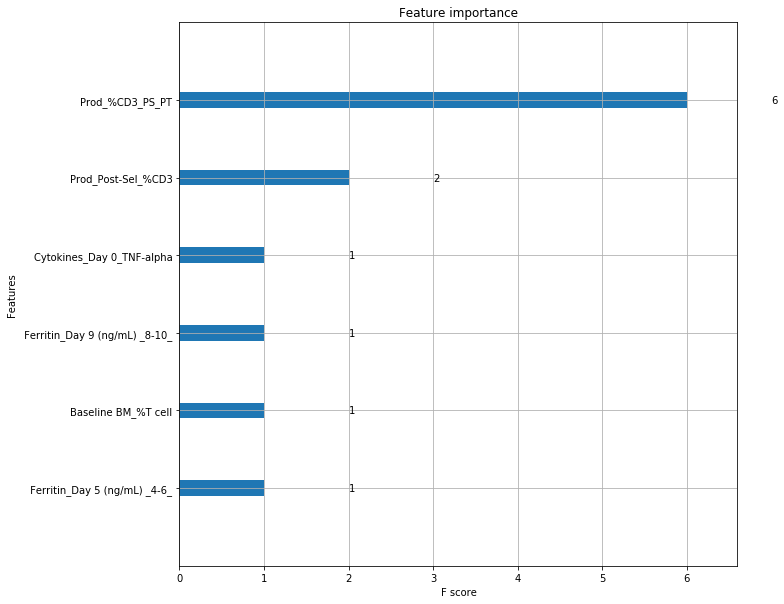

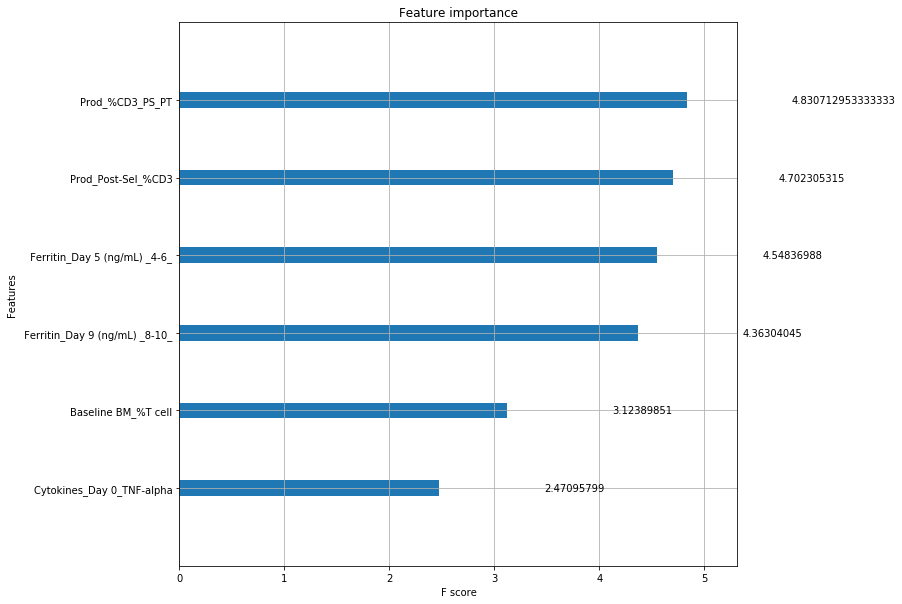

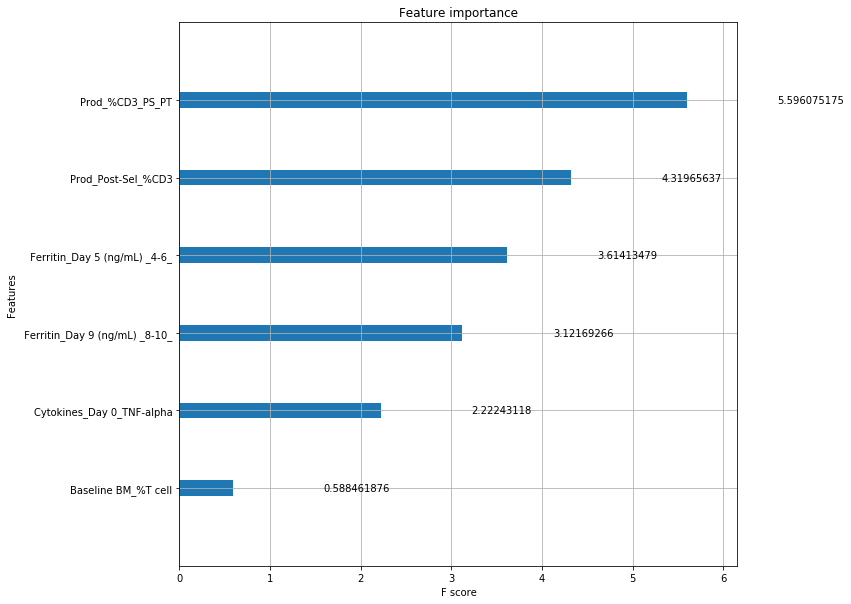

In [35]:
#ft importance of test set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier_test = xgb.train(params= params_default, dtrain = X_test_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_test, importance_type = 'weight'), xgb.plot_importance(xg_classifier_test, importance_type = 'cover'), xgb.plot_importance(xg_classifier_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

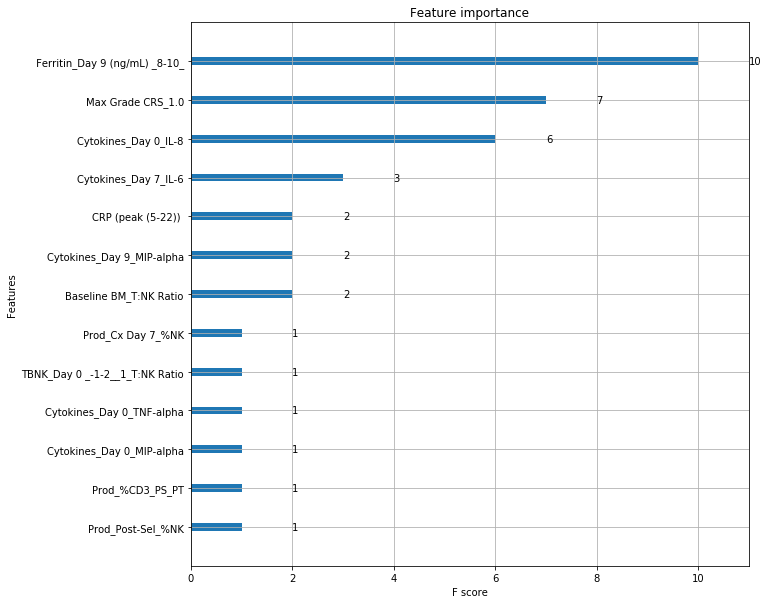

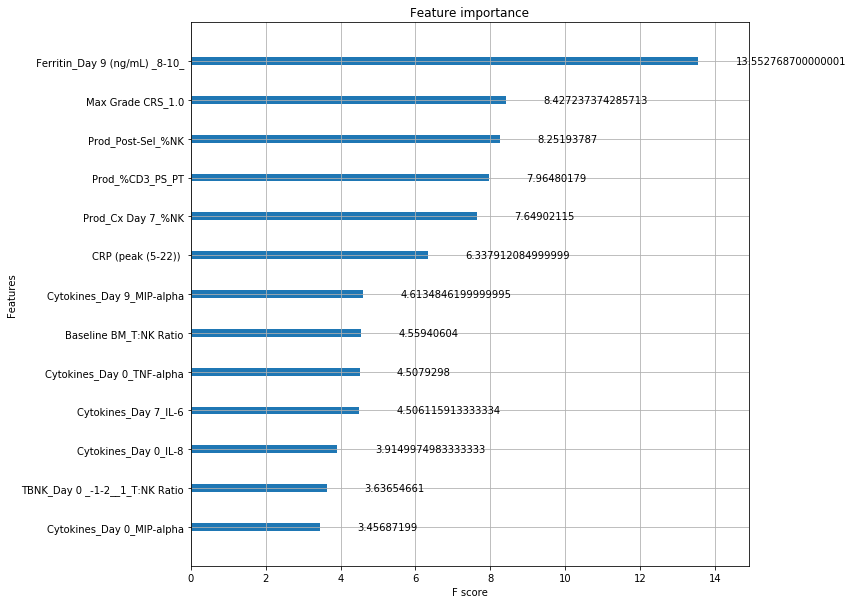

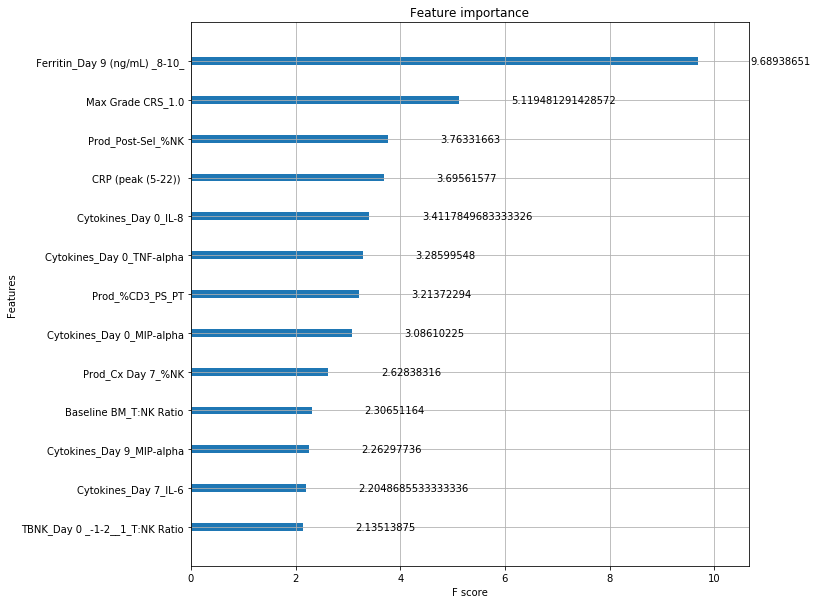

In [36]:
#ft importance of overall set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier = xgb.train(params= params_default, dtrain = X_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier, importance_type = 'weight'), xgb.plot_importance(xg_classifier, importance_type = 'cover'), xgb.plot_importance(xg_classifier, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [40]:
#alt way of looking @ important fts


model = xg_class
model.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
16,Ferritin_Day 9 (ng/mL) _8-10_,0.136277
6,Baseline BM_%T cell,0.099032
138,Max Grade CRS_1.0,0.089347
13,CRP (peak (5-22)),0.071941
67,Prod_Cx Day Final_%NK,0.057951
...,...,...
49,Prod_Aph-Bag)_T:NK Ratio,0.000000
48,Prod_Aph-Bag)_%NK,0.000000
47,Prod_Aph-Bag)_CD4:CD8 Ratio,0.000000
45,Prod_Aph-Bag)_%CD4,0.000000


In [42]:
#alt way of looking @ important fts
#important fts very different between train and test sets in baseline


model = xg_class
model.fit(X_test, y_test)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
52,Prod_%CD3_PS_PT,0.168505
135,Cytokines_Day 9_IL-15,0.121761
53,Prod_Post-Sel_%CD3,0.097282
131,Cytokines_Day 9_IL-8,0.085499
16,Ferritin_Day 9 (ng/mL) _8-10_,0.084200
...,...,...
45,Prod_Aph-Bag)_%CD4,0.000000
44,Prod_Aph-Bag)_%CD3,0.000000
43,CAR EXPANSION (% of T Cells)_Day 10-14,0.000000
42,CAR EXPANSION (absolute)_Day 10-14,0.000000


[0]	validation_0-error:0.102564	validation_0-logloss:0.637052	validation_1-error:0.25	validation_1-logloss:0.653401
[1]	validation_0-error:0.102564	validation_0-logloss:0.588751	validation_1-error:0.25	validation_1-logloss:0.620425
[2]	validation_0-error:0.025641	validation_0-logloss:0.548031	validation_1-error:0.3	validation_1-logloss:0.611077
[3]	validation_0-error:0.025641	validation_0-logloss:0.512774	validation_1-error:0.25	validation_1-logloss:0.579988
[4]	validation_0-error:0.025641	validation_0-logloss:0.480887	validation_1-error:0.3	validation_1-logloss:0.575492
[5]	validation_0-error:0.025641	validation_0-logloss:0.452508	validation_1-error:0.25	validation_1-logloss:0.555952
[6]	validation_0-error:0.025641	validation_0-logloss:0.426525	validation_1-error:0.25	validation_1-logloss:0.559825
[7]	validation_0-error:0.025641	validation_0-logloss:0.40319	validation_1-error:0.25	validation_1-logloss:0.542381
[8]	validation_0-error:0.025641	validation_0-logloss:0.382344	validation_1-

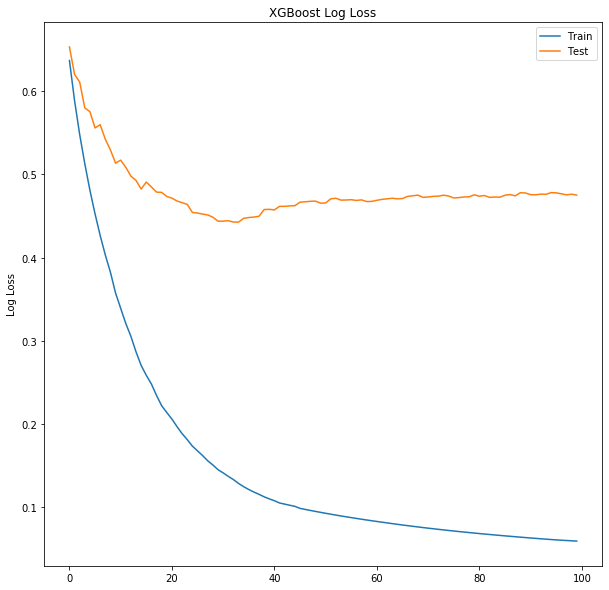

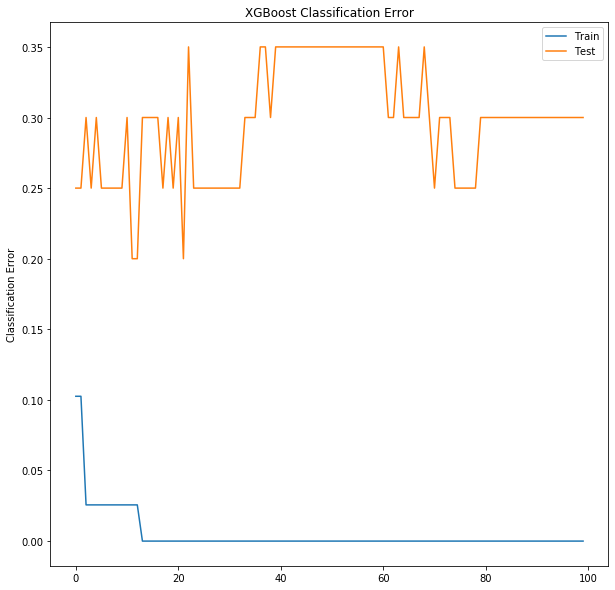

In [44]:
#classification error rate and log loss of default parameters
from matplotlib import pyplot

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Hyperparameter tuning

In [45]:
#tuning 'max_depth' and 'min_child_weight'
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(1,15,2),
 'min_child_weight':range(0,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.10080171, 0.07610766, 0.10656595, 0.08538572, 0.1133879 ,
         0.23112265, 0.08684127, 0.10446421, 0.09258636, 0.08407736,
         0.23046374, 0.08850463, 0.074459  , 0.06860407, 0.08617902,
         0.2985429 , 0.11423691, 0.07234859, 0.08119361, 0.06877359,
         0.25525228, 0.11529771, 0.09337894, 0.11023537, 0.06804268,
         0.24072258, 0.10856366, 0.08606927, 0.09521333, 0.09258223,
         0.22377698, 0.08477235, 0.08833226, 0.09010696, 0.08330377]),
  'std_fit_time': array([0.0017772 , 0.00841914, 0.02559355, 0.01252507, 0.01474669,
         0.00358648, 0.0049614 , 0.02344707, 0.00691819, 0.00499819,
         0.00731595, 0.00196034, 0.00492137, 0.00465605, 0.00880745,
         0.01331855, 0.00284394, 0.00547844, 0.0027684 , 0.01118018,
         0.03227334, 0.00863673, 0.00224836, 0.00585922, 0.00537475,
         0.0418161 , 0.01144358, 0.00208428, 0.00120834, 0.00484184,
         0.00561747, 0.0104662 , 0.02585895, 0.01780676, 0.00963197]

In [46]:
#further tuning min_child_weight and max_depth

param_test1a = {
 'max_depth':[0, 1, 2, 3, 4, 5],
 'min_child_weight':[i/10.0 for i in range (0,40)]
}
gsearch1a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed), 
 param_grid = param_test1a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1a.fit(X_train,y_train)
gsearch1a.cv_results_, gsearch1a.best_params_, gsearch1a.best_score_



({'mean_fit_time': array([0.04086105, 0.04371738, 0.0509514 , 0.04675698, 0.05348937,
         0.04925736, 0.04746683, 0.04528586, 0.05272945, 0.05385923,
         0.05468718, 0.045132  , 0.03677511, 0.04209026, 0.04050644,
         0.04260023, 0.04119563, 0.04305498, 0.04158664, 0.03297178,
         0.03860331, 0.03209933, 0.04090103, 0.03164816, 0.03405809,
         0.03020604, 0.03632259, 0.05549073, 0.04491758, 0.0564576 ,
         0.03788169, 0.05363671, 0.03493301, 0.05621068, 0.04757682,
         0.05584502, 0.04789877, 0.04483628, 0.04847566, 0.05038198,
         0.10514673, 0.10972357, 0.08593925, 0.08517114, 0.07724603,
         0.07976333, 0.07849201, 0.07861757, 0.07959986, 0.07326667,
         0.07196061, 0.07412092, 0.07335925, 0.06946953, 0.0717024 ,
         0.07391628, 0.08066138, 0.06792053, 0.07538287, 0.07644073,
         0.07385763, 0.07492654, 0.07670927, 0.07200631, 0.0755407 ,
         0.07528297, 0.07496277, 0.06597733, 0.06706993, 0.06777859,
         0.067772

In [47]:
#tuning 'gamma' using identified 'max_depth' and 'min_child_weight'
max_depth_tune = 2
min_child_weight_tune = .5
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv}
param_test2 = {
 'gamma':[i/10.0 for i in range(0,100)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.14058328, 0.14755424, 0.12414916, 0.1861829 , 0.16564902,
         0.16958745, 0.12161771, 0.12790704, 0.16638764, 0.18854729,
         0.18480166, 0.18568929, 0.18462054, 0.206393  , 0.19968891,
         0.18259962, 0.15863164, 0.16888229, 0.18008025, 0.14626328,
         0.146679  , 0.1666495 , 0.19537878, 0.19248764, 0.1658086 ,
         0.19384853, 0.19397704, 0.21966076, 0.15529672, 0.15237625,
         0.13017734, 0.14219364, 0.17746067, 0.16054217, 0.15826233,
         0.1848201 , 0.19097106, 0.17747561, 0.15964262, 0.19935274,
         0.18745478, 0.19220599, 0.20575563, 0.17215252, 0.16697176,
         0.17231512, 0.19992963, 0.19464008, 0.19472837, 0.19070276,
         0.19742171, 0.18996453, 0.19823503, 0.18505422, 0.17626866,
         0.16180595, 0.18411581, 0.20355233, 0.20029298, 0.18527166,
         0.1832792 , 0.17631372, 0.16831549, 0.13428442, 0.14244827,
         0.17735561, 0.1673611 , 0.16225362, 0.14115405, 0.14123996,
         0.137564

In [48]:
#tuning 'subsample' and 'colsample_bytree' w/ identified 'gamma', 'max_depth' and 'min_child_weight'
gamma_tune = 4
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune}
param_test3 = {
 'subsample':[i/10.0 for i in range(0,10)],
 'colsample_bytree':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_


({'mean_fit_time': array([0.04544361, 0.05344065, 0.05579559, 0.04032954, 0.04504029,
         0.03466797, 0.04227233, 0.03204489, 0.03925872, 0.03247174,
         0.03956159, 0.05006234, 0.05608662, 0.05511006, 0.06036528,
         0.06809497, 0.04958383, 0.06813971, 0.05859987, 0.05167747,
         0.04588326, 0.04541421, 0.04935543, 0.0505619 , 0.05943592,
         0.05648367, 0.05869683, 0.06872535, 0.08190536, 0.08098324,
         0.05353793, 0.06372269, 0.06573137, 0.09165176, 0.08168634,
         0.08841022, 0.08704464, 0.09376272, 0.09714921, 0.09158397,
         0.0704186 , 0.07170661, 0.08406941, 0.08454768, 0.07607889,
         0.09356793, 0.09004505, 0.09869552, 0.09046459, 0.08848087,
         0.06767559, 0.05404449, 0.07245358, 0.07034302, 0.10367703,
         0.10092894, 0.09660196, 0.11344234, 0.101825  , 0.09430424,
         0.05959662, 0.05106266, 0.06375535, 0.07788197, 0.09038695,
         0.08955518, 0.09943565, 0.09691175, 0.09719014, 0.10829329,
         0.058592

In [49]:
#tuning subsample in .05 intervals around determined values

param_test4 = {
 'subsample':[i/100.0 for i in range(80,100,5)],
 'colsample_bytree':[i/100.0 for i in range(20,60,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

#subsample and colsample_bytree changed

({'mean_fit_time': array([0.069556  , 0.08073235, 0.08473992, 0.07959231, 0.08653545,
         0.08100462, 0.09290727, 0.08601332, 0.06527535, 0.06804585,
         0.06621854, 0.06728967, 0.06610672, 0.07267412, 0.08283655,
         0.06698267, 0.08308943, 0.08752298, 0.08044171, 0.08055917,
         0.08293724, 0.07286008, 0.08880432, 0.08866064, 0.09870648,
         0.10067519, 0.0963045 , 0.08609192, 0.09968432, 0.08256173,
         0.09637197, 0.10955397]),
  'std_fit_time': array([0.01332392, 0.00447414, 0.0030036 , 0.02177199, 0.01221386,
         0.01082679, 0.0199136 , 0.02252277, 0.00450643, 0.00277639,
         0.00658011, 0.00382203, 0.0062983 , 0.00314678, 0.01625675,
         0.00251454, 0.01471096, 0.01839328, 0.00304107, 0.00671902,
         0.00255579, 0.00578311, 0.01212783, 0.00792351, 0.01248264,
         0.0106471 , 0.01696595, 0.00376522, 0.00805029, 0.01125785,
         0.05434824, 0.03699249]),
  'mean_score_time': array([0.01230669, 0.01552105, 0.01952338, 0.018

In [50]:
#tuning regularization parameters
subsample_tune = .85
colsample_bytree_tune = .4
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune}

param_test5 = {
 'reg_alpha':[0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.09648101, 0.11523668, 0.14006933, 0.10599438, 0.11524137,
         0.10001071, 0.09482328, 0.12587365, 0.08248893]),
  'std_fit_time': array([0.02507667, 0.03368087, 0.01879332, 0.02830509, 0.01348887,
         0.00646166, 0.00726013, 0.01796319, 0.02037369]),
  'mean_score_time': array([0.01192133, 0.01534931, 0.01956908, 0.02290972, 0.01832724,
         0.01127021, 0.02522127, 0.01769304, 0.01141596]),
  'std_score_time': array([0.00098937, 0.00318864, 0.00241618, 0.00153435, 0.00608529,
         0.0007315 , 0.00502985, 0.00290321, 0.0016366 ]),
  'param_reg_alpha': masked_array(data=[0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 1e-06},
   {'reg_alpha': 1e-05},
   {'reg_alpha': 0.0001},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.01},
   {'reg_a

In [51]:
#tuning alpha more finely parameters

#param_test6 = {
# 'reg_alpha':[0, .001, .005, .01, .05, .1, .15, .2, .25, .5]
#}
#gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=max_depth_tune,
# min_child_weight=min_child_weight_tune, gamma=gamma_tune, subsample=subsample_tune, colsample_bytree=colsample_bytree_tune,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=seed), 
# param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
#gsearch6.fit(X,y)
#gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_
##reg alpha uncahged

In [52]:
#tuning learning rate
reg_alpha_tune = 0

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'reg_alpha': reg_alpha_tune}
param_test7 = {
 'learning_rate':[1e-06, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, .2, .3, .5, 1]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7.fit(X_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_
#changed

({'mean_fit_time': array([0.11301875, 0.11095595, 0.121756  , 0.11850739, 0.11690466,
         0.12629644, 0.11128505, 0.1221559 , 0.16019694, 0.1133666 ]),
  'std_fit_time': array([0.00559673, 0.01569252, 0.00553903, 0.00915457, 0.00934599,
         0.00242155, 0.00577737, 0.01510258, 0.04166954, 0.01723973]),
  'mean_score_time': array([0.01379164, 0.01980662, 0.01750803, 0.01871959, 0.01904217,
         0.01973057, 0.01611423, 0.04364832, 0.01784865, 0.01630457]),
  'std_score_time': array([0.00062484, 0.00683141, 0.00467736, 0.00322729, 0.00428774,
         0.00891164, 0.00453102, 0.01892941, 0.00819344, 0.00094831]),
  'param_learning_rate': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5,
                     1],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 1e-06},
   {'learning_rate': 1e-05},
   {'learni

In [53]:
#tuning learning rate more finely
param_test7a = {
 'learning_rate':[.1, .15, .2, .25, .3]
}
gsearch7a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = .2), 
 param_grid = param_test7a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7a.fit(X_train,y_train)
gsearch7a.cv_results_, gsearch7a.best_params_, gsearch7a.best_score_
#unchanged

({'mean_fit_time': array([0.08606664, 0.10327697, 0.12369132, 0.05759287, 0.06448579]),
  'std_fit_time': array([0.0159646 , 0.02285197, 0.00517591, 0.00863292, 0.00639502]),
  'mean_score_time': array([0.01792034, 0.02072438, 0.01991137, 0.00835538, 0.00870768]),
  'std_score_time': array([0.00499278, 0.0092022 , 0.0035082 , 0.00262911, 0.00236478]),
  'param_learning_rate': masked_array(data=[0.1, 0.15, 0.2, 0.25, 0.3],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.1},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2},
   {'learning_rate': 0.25},
   {'learning_rate': 0.3}],
  'split0_test_score': array([0.86666667, 0.91111111, 0.95555556, 0.92222222, 0.94444444]),
  'split1_test_score': array([0.6875, 0.6125, 0.6875, 0.6375, 0.6875]),
  'split2_test_score': array([0.78125 , 0.765625, 0.765625, 0.90625 , 0.75    ]),
  'mean_test_score': array([0.77847222, 0.7630787 , 0.80289352, 0.821

In [54]:
#tuning n_estimators
learning_rate_tune = .25
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune}

param_test8 = {
 'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 115, 125, 150, 175, 200, 350, 400, 450, 500]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = learning_rate_tune), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch8.fit(X_train,y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_
#changed

({'mean_fit_time': array([0.02729837, 0.01642934, 0.02718075, 0.03375165, 0.02547224,
         0.02303362, 0.03232455, 0.02359398, 0.04274694, 0.02639596,
         0.03303099, 0.03578671, 0.03366105, 0.03409266, 0.02834392,
         0.03561513, 0.04592188, 0.04082338, 0.05429777, 0.04855299,
         0.06006885, 0.05740515, 0.08537372, 0.09811473, 0.11580618,
         0.1757853 , 0.13568107, 0.21759009, 0.20003271, 0.33065613,
         0.30918169, 0.35844564, 0.47038833]),
  'std_fit_time': array([0.01519113, 0.00170084, 0.00692496, 0.01293286, 0.00466241,
         0.00639845, 0.00864945, 0.00202021, 0.00547555, 0.00563195,
         0.00636876, 0.01392101, 0.00997253, 0.00949681, 0.00162044,
         0.00837473, 0.00540859, 0.00191143, 0.0088239 , 0.00232493,
         0.00774509, 0.00475279, 0.01445387, 0.00619145, 0.00512296,
         0.03492964, 0.00249149, 0.04001092, 0.02347721, 0.09790915,
         0.05677295, 0.06794742, 0.1081278 ]),
  'mean_score_time': array([0.02207232, 0.013

In [55]:
#tuning colsample_bynode, colsample_bylevel

n_estimators_tune = 30
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_testimators': n_estimators_tune}
param_test9 = {
 'colsample_bynode': [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
    'colsample_bylevel': [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch9.fit(X_train,y_train)
gsearch9.cv_results_, gsearch9.best_params_, gsearch9.best_score_
#changed

({'mean_fit_time': array([0.02270071, 0.04831902, 0.04869199, 0.03871457, 0.04112204,
         0.0500505 , 0.05086509, 0.0434893 , 0.05277928, 0.04291892,
         0.04261041, 0.03686388, 0.04423149, 0.0459253 , 0.0379223 ,
         0.03529803, 0.03555067, 0.03699128, 0.03734732, 0.03490893,
         0.03861904, 0.03758709, 0.03669961, 0.03715507, 0.0367167 ,
         0.03232233, 0.03350933, 0.03421259, 0.03489868, 0.05349501,
         0.04566201, 0.0330046 , 0.04811772, 0.03657262, 0.03900472,
         0.04411721, 0.04200331, 0.03345513, 0.04477636, 0.03796482,
         0.05524206, 0.04603831, 0.04447524, 0.0517265 , 0.05089458,
         0.03097335, 0.0353876 , 0.02933963, 0.03552039, 0.02984961,
         0.03550871, 0.03175966, 0.03883632, 0.03508504, 0.03239218,
         0.02481476, 0.03227305, 0.03412024, 0.03278367, 0.03189103,
         0.03238201, 0.04762983, 0.06560524, 0.04993471, 0.05318403,
         0.05084356, 0.04675659, 0.04754861, 0.06560222, 0.04851874,
         0.046115

In [56]:
#tuning reg_lambda and verbosity

colsample_bylevel_tune = 1
colsample_bynode_tune = 1

param_test10 = {
 'verbosity': [0, 1, 2, 3],
    'reg_lambda': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
}
gsearch10 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune, colsample_bynode = colsample_bynode_tune, colsample_bylevel = colsample_bylevel_tune), 
 param_grid = param_test10, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch10.fit(X_train,y_train)
gsearch10.cv_results_, gsearch10.best_params_, gsearch10.best_score_
#changed

({'mean_fit_time': array([0.05658404, 0.04256042, 0.08401155, 0.04639451, 0.03631139,
         0.04158266, 0.05176163, 0.04957223, 0.0344638 , 0.03541907,
         0.05411204, 0.03700487, 0.03790077, 0.02912482, 0.03282793,
         0.03619266, 0.03130444, 0.0316999 , 0.05066164, 0.03589304,
         0.03078906, 0.02977006, 0.03348589, 0.03460844, 0.03259357,
         0.02979326, 0.04359023, 0.03276889, 0.03164784, 0.03111307,
         0.03446023, 0.03203146, 0.03039034, 0.02973866, 0.03462998,
         0.0300204 , 0.02997692, 0.02793304, 0.03128735, 0.03160334]),
  'std_fit_time': array([0.03359605, 0.00711689, 0.01919733, 0.01076315, 0.00937892,
         0.01260575, 0.00838438, 0.01374757, 0.00286432, 0.00457475,
         0.0043393 , 0.00216171, 0.00738271, 0.00042235, 0.00094062,
         0.00435237, 0.00313679, 0.0023533 , 0.0176965 , 0.00295143,
         0.00127534, 0.00154465, 0.00358782, 0.00178594, 0.00371633,
         0.00120971, 0.00783098, 0.00205581, 0.00393849, 0.00261817,

In [57]:
reg_lambda_tune =0
verbosity_tune = 0

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
              'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune, 'verbosity': verbosity_tune}

In [58]:
#rerunning model with TUNED HYPERPARAMETER SCORES


xg_class_tuned = xgb.XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = 6, colsample_bynode = colsample_bynode_tune, 
                               colsample_bylevel = colsample_bylevel_tune, reg_lambda = reg_lambda_tune, verbosity = verbosity_tune) 

In [59]:
xg_class_tuned.fit(X_train,y_train)

preds = xg_class_tuned.predict(X_test)

preds

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [60]:
#looking at classification report to see how TUNED model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        13
         1.0       0.75      0.43      0.55         7

    accuracy                           0.75        20
   macro avg       0.75      0.68      0.69        20
weighted avg       0.75      0.75      0.73        20



In [61]:
# train-test split evaluation of xgboost model (tuned params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%


In [62]:
# k-fold cross validation evaluation of TUNED xgboost model
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


#kfold = KFold(n_splits=cv, random_state=seed)
results_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold)
print("New Accuracy: %.2f%% (%.2f%%)" % (results_tuned.mean()*100, results_tuned.std()*100))


#compared to k-fold cross validation of default
print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))

results_tuned


New Accuracy: 72.63% (11.19%)
Compared to accuracy of default: 69.47% (4.15%)


array([0.85      , 0.75      , 0.57894737])

In [63]:
# stratified k-fold cross validation evaluation of xgboost model
#from sklearn.model_selection import StratifiedKFold


#kfold_strat = StratifiedKFold(n_splits=cv, random_state=seed)
results_strat_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat_tuned.mean()*100, results_strat_tuned.std()*100))
print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))

results_strat_tuned

Accuracy: 74.39% (8.93%)
Compared to accuracy of default: 72.98% (5.87%)


array([0.85      , 0.75      , 0.63157895])

In [64]:
xg_class_tuned.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
16,Ferritin_Day 9 (ng/mL) _8-10_,0.136277
6,Baseline BM_%T cell,0.099032
138,Max Grade CRS_1.0,0.089347
13,CRP (peak (5-22)),0.071941
67,Prod_Cx Day Final_%NK,0.057951
...,...,...
49,Prod_Aph-Bag)_T:NK Ratio,0.000000
48,Prod_Aph-Bag)_%NK,0.000000
47,Prod_Aph-Bag)_CD4:CD8 Ratio,0.000000
45,Prod_Aph-Bag)_%CD4,0.000000


In [66]:
#important variables for test set and training set are now THE SAME, which is good
#might be worth limiting # of features avail to start

xg_class_tuned.fit(X_test, y_test)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
16,Ferritin_Day 9 (ng/mL) _8-10_,0.136277
6,Baseline BM_%T cell,0.099032
138,Max Grade CRS_1.0,0.089347
13,CRP (peak (5-22)),0.071941
67,Prod_Cx Day Final_%NK,0.057951
...,...,...
49,Prod_Aph-Bag)_T:NK Ratio,0.000000
48,Prod_Aph-Bag)_%NK,0.000000
47,Prod_Aph-Bag)_CD4:CD8 Ratio,0.000000
45,Prod_Aph-Bag)_%CD4,0.000000


In [67]:
#unsure why this isn't working

#params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
 #             'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
  #            'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune, 'verbosity': verbosity_tune}

xg_classifier_tune_test = xgb.train(params= params_tune, dtrain = X_test_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_tune_test, importance_type = 'weight'), xgb.plot_importance(xg_classifier_tune_test, importance_type = 'cover'), xgb.plot_importance(xg_classifier_tune_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()




ValueError: Booster.get_score() results in empty

In [68]:
#unsure why this isn't working

xg_classif_tune_train = xgb.train(params= params_tune, dtrain = X_train_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classif_tune_train, importance_type = 'weight'), xgb.plot_importance(xg_classif_tune_train, importance_type = 'cover'), xgb.plot_importance(xg_classif_tune_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

ValueError: Booster.get_score() results in empty

[0]	validation_0-error:0.153846	validation_0-logloss:0.564461	validation_1-error:0.4	validation_1-logloss:0.66353
[1]	validation_0-error:0.128205	validation_0-logloss:0.456765	validation_1-error:0.35	validation_1-logloss:0.585801
[2]	validation_0-error:0.076923	validation_0-logloss:0.367157	validation_1-error:0.2	validation_1-logloss:0.519579
[3]	validation_0-error:0.051282	validation_0-logloss:0.316013	validation_1-error:0.3	validation_1-logloss:0.515831
[4]	validation_0-error:0.051282	validation_0-logloss:0.31148	validation_1-error:0.3	validation_1-logloss:0.518462
[5]	validation_0-error:0.025641	validation_0-logloss:0.268567	validation_1-error:0.25	validation_1-logloss:0.55471
Accuracy: 75.00%


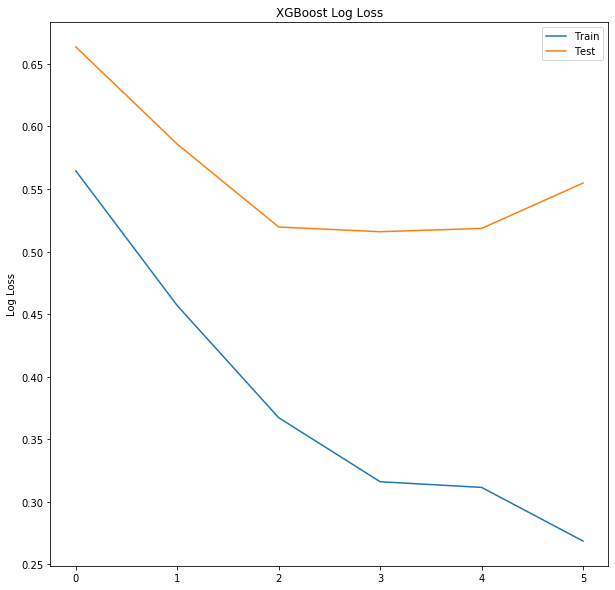

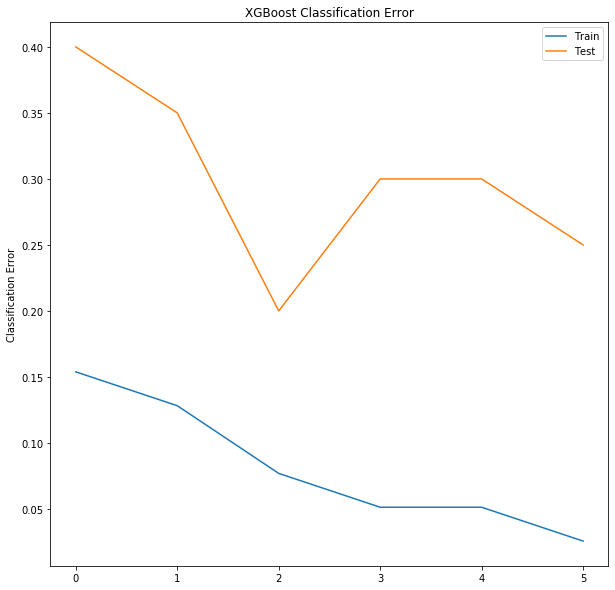

In [72]:
# plot classification error rate and log loss for tuned dataset

from numpy import loadtxt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = xg_class_tuned
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()



##
##
##HOW TO MAKE EPOCHS = 2 ??##

[0]	validation_0-error:0.102564	validation_0-logloss:0.637052	validation_1-error:0.25	validation_1-logloss:0.653401
[1]	validation_0-error:0.102564	validation_0-logloss:0.588751	validation_1-error:0.25	validation_1-logloss:0.620425
[2]	validation_0-error:0.025641	validation_0-logloss:0.548031	validation_1-error:0.3	validation_1-logloss:0.611077
[3]	validation_0-error:0.025641	validation_0-logloss:0.512774	validation_1-error:0.25	validation_1-logloss:0.579988
[4]	validation_0-error:0.025641	validation_0-logloss:0.480887	validation_1-error:0.3	validation_1-logloss:0.575492
[5]	validation_0-error:0.025641	validation_0-logloss:0.452508	validation_1-error:0.25	validation_1-logloss:0.555952
[6]	validation_0-error:0.025641	validation_0-logloss:0.426525	validation_1-error:0.25	validation_1-logloss:0.559825
[7]	validation_0-error:0.025641	validation_0-logloss:0.40319	validation_1-error:0.25	validation_1-logloss:0.542381
[8]	validation_0-error:0.025641	validation_0-logloss:0.382344	validation_1-

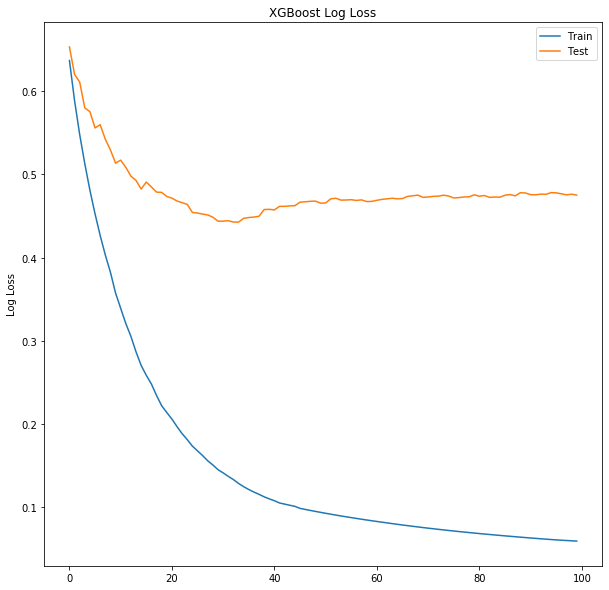

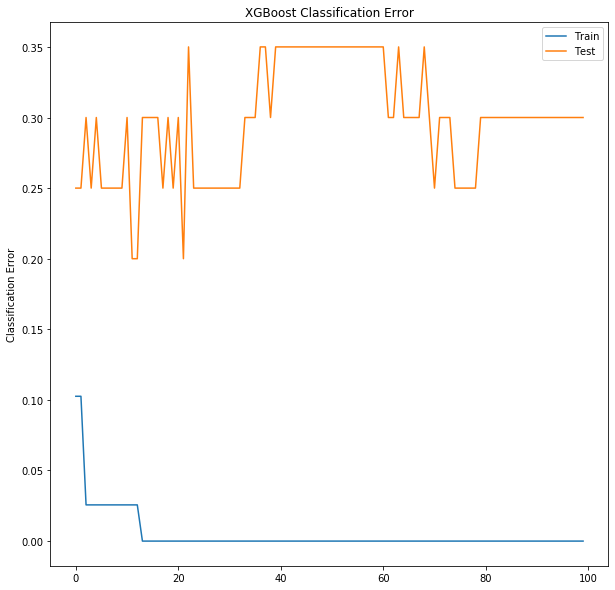

In [73]:
#compared to log loss and classification error rate using default test parameters for comparison

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Remaining To Do


## Additional Modeling
-XGboost
- model with fewer parameters to start

-Log Reg +/- RF
- with MICE (Multivariate Imputation via Chained Equations)
-without MICE (recreating prior model)

## Prospective Validation (Eventually)
- Additional 5-10 pts in cohort
    - Determine best way to plug in new data
    
## Other
- Figure out how to show and isolate columns with a certain proportion of missing data or above 
- print decision trees!

# Limitations
- Small Dataset